# ![uda-logo](img/udacity.png) Project: Wrangling WeRateDogs' Enhanced Twitter Archive 🐶

## Description
><hr>
> <a href='www.twitter.com/dog_rates'>WeRateDogs</a> (later referred to as <b>WRD</b> in this document) is a Twitter account, created by Matt Nelson, that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because <a href="https://knowyourmeme.com/memes/theyre-good-dogs-brent">"they're good dogs Brent"</a>. WRD has over 9 million followers and has received international media coverage.
>
> Here are a few snippet's of WRD's Twitter account 👇🏾 
>
>  WRD's profile            |  WRD's tweet structure
>:-------------------------:|:-------------------------:
>![](img/wrd_tw_home.png)   |  ![](img/wdr-tw-tweet.png)
> 
> This project focuses on actualizing and accentuating the three data wrangling techniques on the WRD Twitter archive as part of Udacity's Data Analysis curriculum. WRD downloaded their Twitter archive and sent it to Udacity via email exclusively for use in this project. The archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017. Two other datasets that will be used in this study include a `tsv file` provided by Udacity that includes results obtained from running images of the in WRD's tweets through a <a href="https://www.ibm.com/cloud/learn/neural-networks">neural network</a> and additional tweet data that I will have to scrape using the  <a href="https://developer.twitter.com/en/docs/twitter-api">`Twitter API`</a>.

### Hypotheses and Pre-EDA remarks
><hr>
> Based on the data that I will be acquiring, I figured I would have to deduce any actionable insights from the `ratings`, number of engagements in the form of `retweets` 🔁 and, `favorite`❤️, the `predicted_dog_breed` derived from Udacity's neural network test, `timestamps` to ascertain changes over a period of time and `text` from the the tweets for a sentiment analysis study on WRD.
>
> After a meticulous hypotheses construction process, I decided to pull on my Inspector Gadget coat on and investigate the following questions:
> 1. Which dog breeds obtained the highest ratings on average? 
> 1. Which dog breeds have attracted the most engagement on WRD over the time period in question (2015-2017)? 
> 1. What are the most used words on WRD? (I will print out a cool [wordcloud](https://www.google.com/search?q=wordcloud) for this)
> 1. Generally, what's the sentiment given off by WRD? Is it positive, neutral or negative? Is it subjective (personal and opinionated) or objective (factual)?

### Modules used in this notebook:
><hr>
>
> I've used Python and many of it's rich features to come up with my solutions. The following are the dependencies required to run this application:
>* `Pandas`
>* `Numpy`
>* `Tweepy`
>* `Requests`
>* `Plotly`
>* `TextBlob`
>* `WordCloud`
>* `Python-dotenv`
>* `re`
>* `_json`
>* `os`
>* `unittest`
>
> You can install them using `requirements.txt` file or `environment.yml` file in the `dependencies`. Run either one of these at the root of your project depending on your environment manager:
> * Pip: `pip install -r dependencies/requirements.txt`
> * Anaconda: `conda env create -f dependencies/environment.yml `

In [1]:
# import required modules
import requests
import tweepy as twpy
from dotenv import load_dotenv
from textblob import TextBlob
from wordcloud import WordCloud
import _json
import unittest

import pandas as pd
import numpy as np
import os
import re

#ensure all Plotly plots render while offline
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)
import plotly.express as px

## Data Wrangling
> I will acquire, appraise and floss all my datasets to the best fit for this study using the various installed modules. Each process will make use of custom functions to attempt cut on clunky and repetitive code. 

### Gather
><hr>
>
>This project involves obtaining three separate datasets from various sources. I will be using different methods to obtain each dataset as specified below.
> This custom function built from Pandas' `read_csv()` method will be used to read various datasets. The `header` and `names` parameters will override each other depending on which of the two is set to `None` by default or passed as an arg.

In [2]:
#custom function to read data into Pandas DataFrame
def open_set(csv, sep=',', header=0, names=[]):
    df = pd.read_csv(csv, low_memory=False, sep=sep, names=names, header=header)
    
    return df

#### **`twitter-archive-enhanced` table**
><hr>
>
> WRD's Twitter archive data was provided by Udacity and **downloaded manually through the Chrome browser.** I will import the data locally from my storage in the `data` folder using `open_set()`.

In [3]:
df_tw_arch = open_set('data/twitter-archive-enhanced.csv', header=0, names=None)
df_tw_arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


> The WRD Twitter archive data has been saved into the `df_tw_arch` dataframe 🙂
><hr>

#### **`image-predictions` table**
>
>The `image_predictions.tsv` file is present in each tweet, according to a neural network. It is hosted on Udacity's servers and will be **downloaded programmatically using the Requests library**. 

In [ ]:
# store the hyperlink in a variable
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

> * Use **`requests.get()`** to obtain the data from the url
> * Parse the content into a new file named `image-predictions.tsv`. (Note the file is opened using `wb` since the content obtained is returned in byte format) 👇🏾
>* The content obtained from the file hosted on the url will be written into a file on the local machine using Python's **open()** method in a `try-finally` block. 

In [ ]:
r = requests.get(url)

try:
    f = open('image-predictions.tsv', 'wb')
    f.write(r.content)
    
finally:
    f.close()

> * `tsv` stands for tab-separated-values so it would make sense to specify tabs (`\t`) as the separator in Pandas' the `open_set()` function.

In [4]:
df_image_pred = open_set('data/image-predictions.tsv', sep='\t', names=None, header=0)
df_image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


> The neural network data has been saved into the `df_image_pred` dataframe 🙂
><hr>

#### **Obtaining additional tweet data from `Twitter API` using Python's `Tweepy`** module
>
>* For our final dataset, we will be using the `Twitter API` and Python's `Tweepy` library to query Twitter for each tweet's **retweet_count**, **favorite_count**, **geo data** and **language data**. These attributes will later be used to generate insights.
>
>* **<span style="color:#add8e6">Note that you need either a combination of your consumer_key, consumer_secret, access_key and access_key secret or a bearer_token to query data through the Twitter API.**</span>
>
>* I put to use Python's `dotenv` and `os` libraries to cache my `bearer_token` from a secret file and load its value using the `load_dotenv()` and `os.getenv()` methods respectively.

In [ ]:
# Cache the file into the environment
load_dotenv('.env')

>* I opted for a custom function to obtain tweet data through Tweepy's [**_get_status()_**](http://docs.tweepy.org/en/v3.5.0/api.html) method. The `tweet_id` from  the `df_tw_arch` dataset will be converted to a list and passed into the function. Each tweet's JSON data that I require for this project will be parsed into a new file (`tweet_json.txt`) and appended one after the other.
>
>* There are a few tweets and retweets that may have been deleted since WRD's submission of their archive. I have used a `try-except` block to capture their **tweet_id** into a separate array for later analysis.

In [ ]:
# custom to extract tweet data
def get_tweets(ids):
    
    # Authorization to bearer_token
    auth = twpy.OAuth2BearerHandler(os.getenv('BEARER_TOKEN'))
    
    # Calling api
    api = twpy.API(auth, wait_on_rate_limit = True)
    
    # Empty Array
    del_tweets = []
    
    # Start a code timer for the loop
    for tw_id in ids: 
        try:
            tw_status = api.get_status(tw_id, tweet_mode='extended')._json
            try:
                f = open('data/tweet_json.txt', 'a+', encoding='utf-8')
                f.write(f"{tw_status['id']},{tw_status['retweet_count']},{tw_status['favorite_count']},{tw_status['geo']},{tw_status['lang']}\n")
            finally:
                f.close()
            rt_count = tw_status['retweet_count']
            fv_count = tw_status['favorite_count']
                        
            print(f'This tweet -> {tw_id} has {rt_count} retweets and {fv_count} likes')
        except Exception as e:
            print(f'This tweet -> {tw_id} has been deleted')
            del_tweets.append({'tweet_id': tw_id})
    
    
    
    # Print out the deleted tweet_ids
    return (f'These are the deleted tweet_ids:\n{del_tweets}')

> * Capture all the data in the `tweet_id` column of `df_tw_arch` into a list

In [ ]:
tw_ids = list(df_tw_arch.tweet_id)
tw_ids

> * Pass the list of tweet_ids into our custom function `get_tweets()`

In [ ]:
#obtain all the tweet data we require
get_tweets(tw_ids)

> * As expected, a number of tweets in the archive have long since been deleted and will be utterly useless for our any insights that require the data I pulled from the api. I will have to find away to "balance out" these missing values.
>
> * Here's how the `tweet_json.txt` file has been saved. Each value is separated using commas so this will make it easy to read with the `open_set()` function.
> <p align="center"><img src="img/twt_json.png"/></p>
>
> * We will then read the data from `tweet_json.txt` using my `open_set()` function and specify the column tags using the `names` parameter.

In [5]:
# read our data from the text file into a dataframe
df_tw_data = open_set('data/tweet_json.txt', names=['tweet_id', 'retweet_count', 'favorite_count', 'geo_data', 'lang_data'], header=None)

> * To later assess the data obtained from the Twitter api visually using Excel/Sheets, I will export it to a csv file using Pandas' `to_csv()` function

In [6]:
df_tw_data.to_csv('data/tw_data.csv',index=False)
df_tw_data

,tweet_id,retweet_count,favorite_count,geo_data,lang_data
0,892420643555336193,7009,33809,None,en
1,892177421306343426,5301,29332,None,en
2,891815181378084864,3481,22052,None,en
3,891689557279858688,7225,36937,None,en
4,891327558926688256,7760,35311,None,en
...,...,...,...,...,...
2027,671166507850801152,302,783,None,en
2028,671163268581498880,968,1461,None,en
2029,671159727754231808,69,313,None,en
2030,671154572044468225,186,625,None,en


> We've got the data obtained from Twitter api into a dataframe 🙂 
><hr>

### Assess 
><hr>
>
> * I will use a spreadsheet program for my visual assessment (Google Sheets, MS Excel etc) and employ Pandas' and Numpy libraries for my programmatic assessment. I will be focusing on quality and tidiness checks. These will include missing, duplicate, incorrect, corrupted and messy data records.
>
> * Inferences and mental checks will be made following each assessment procedure. 

#### **`df_tw_arch`**
<hr>

##### Visual Assessment

>* Here is an screenshot of the Twitter archive opened in Excel
>
>|![tw_arch.csv](img/tw_arch.png)|
>|:--:|
>|<b> The Twitter Archive Dataset</b>|

> * There are a few columns with glaringly empty fields: `in_reply_to_status`, `in_reply_to_user_id`, `retweeted_status_user_id`, `retweeted_status_timestamp` **(Quality Issue)**
> * At a glance, `rating_denominator` seems to have only one unique value and hence no insights can be obtained from that column. I will investigate this further. **(Quality issue)**
>* The four columns describing the "stage" the dog is in should be transposed into one column. **(Tidiness issue)**

##### Programmatic Assessment
<hr>

In [7]:
df_tw_arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


 > * The `expanded_url` column is not required for this study as it just the full hyperlink to WRD's tweets. **(Tidiness issue)**
 > * The `source` column should be a string of the source from which the data was obtained and not a hyperlink i.e. Twitter, Vine, Tweetdeck **(Tidiness)**

In [8]:
for col in df_tw_arch.columns:
    print(f'The "{col}" column has {df_tw_arch[col].nunique()} unique values')

The "tweet_id" column has 2356 unique values
The "in_reply_to_status_id" column has 77 unique values
The "in_reply_to_user_id" column has 31 unique values
The "timestamp" column has 2356 unique values
The "source" column has 4 unique values
The "text" column has 2356 unique values
The "retweeted_status_id" column has 181 unique values
The "retweeted_status_user_id" column has 25 unique values
The "retweeted_status_timestamp" column has 181 unique values
The "expanded_urls" column has 2218 unique values
The "rating_numerator" column has 40 unique values
The "rating_denominator" column has 18 unique values
The "name" column has 957 unique values
The "doggo" column has 2 unique values
The "floofer" column has 2 unique values
The "pupper" column has 2 unique values
The "puppo" column has 2 unique values


> * I want to assess the `source`, `doggo`, `floofer`, `pupper` and `puppo` columns due to the few number of unique values and how best to represent them.

In [9]:
df_tw_arch.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

>* I could shift these values into less clunky data as it is at the moment and turn it into values like Twitter for Web Client, Vine, Tweetdeck etc. 

In [10]:
df_tw_arch[['doggo', 'floofer', 'pupper', 'puppo']].sample(10)

,doggo,floofer,pupper,puppo
298,None,None,None,None
1986,None,None,None,None
1849,None,None,None,None
1449,None,None,pupper,None
177,None,None,None,None
1179,None,None,None,None
2181,None,None,None,None
509,None,None,None,None
1333,None,None,None,None
1666,None,None,None,None


>* I could change this data into one transposed column e.g. `dog_stage` that describes the dogs' stages without having it sparsed out into 4 separate columns `

In [11]:
df_tw_arch.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


> * Based on WRD's rating convention, the mean of `rating_denominator`should not exceed 10. **(Quality Issue)**

In [12]:
df_tw_arch.rating_numerator.unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88], dtype=int64)

> * There are few ratings that are well out the scope described by WRD's rating system i.e 420, 666, 182, 960, 165, 1776, 204, 143, 121 etc **(Quality issue)**

In [13]:
df_tw_arch.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

> * There are few rating_denominators that are well out the scope described by WRD's rating system i.e 150, 130, 110, 120, 70, 0, 50 etc **(Quality issue)**

In [14]:
rs = []
i=0
while i < 2355:
    result = df_tw_arch.rating_numerator[i] > 99
    if result:
        rs.append(i)
    i += 1

df_tw_arch.iloc[rs]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1634,684225744407494656,6.842229e+17,4.196984e+09,2016-01-05 04:11:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Two sneaky puppers were not initially seen, mo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/684225744...,143,130,None,None,None,None,None
1635,684222868335505415,NaN,NaN,2016-01-05 04:00:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Someone help the girl is being mugged. Several...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684222868...,121,110,None,None,None,None,None
1779,677716515794329600,NaN,NaN,2015-12-18 05:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",IT'S PUPPERGEDDON. Total of 144/120 ...I think...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677716515...,144,120,None,None,None,None,None


In [15]:
i = 0
rs = []
while i < 2355:
    result = df_tw_arch.rating_denominator[i] != 10
    if result:
        rs.append(i)
    i += 1

df_tw_arch.iloc[rs]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


> * The records above have been affected by entry issues in the `rating_numerator` and `rating_denominator` columns. **(Quality issue)**

In [16]:
df_tw_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

> * The `timestamp` column's datatype should be altered to datetime **(Quality issue)**

In [17]:
df_tw_arch.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

> * As expected from the visual assessment made, the `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp` have a lot of null entries **(Quality issue)**

In [18]:
df_tw_arch.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

>* A number of dog names were not entered making it difficult to analyze whether a dog's name has any influence over WRD's given rating **(Quality Issue)**

In [19]:
df_tw_arch.tweet_id.value_counts()

892420643555336193    1
687102708889812993    1
687826841265172480    1
687818504314159109    1
687807801670897665    1
                     ..
775085132600442880    1
774757898236878852    1
774639387460112384    1
774314403806253056    1
666020888022790149    1
Name: tweet_id, Length: 2356, dtype: int64

> * There are no duplicated tweets in this dataset 🙂
><hr>

#### **`df_tw_data`**
<hr>

##### Visual Assessment

>* Here is an screenshot of the Twitter API data opened in Excel
>
>|![tw-data-csv](./img/tw_data.png)|
>|:--:|
>|<b> The Twitter API Dataset</b>|

> * The `geo_data` column seem to have just one unique entries. Generating any meaningful insights will seemingly prove futile from this column. **(Quality Issue)**

> ##### Programmatic Assessment
<hr>

In [20]:
df_tw_data.head()

,tweet_id,retweet_count,favorite_count,geo_data,lang_data
0,892420643555336193,7009,33809,None,en
1,892177421306343426,5301,29332,None,en
2,891815181378084864,3481,22052,None,en
3,891689557279858688,7225,36937,None,en
4,891327558926688256,7760,35311,None,en


In [21]:
df_tw_data.tail()

,tweet_id,retweet_count,favorite_count,geo_data,lang_data
2027,671166507850801152,302,783,None,en
2028,671163268581498880,968,1461,None,en
2029,671159727754231808,69,313,None,en
2030,671154572044468225,186,625,None,en
2031,671151324042559489,128,588,None,en


> * The main issue is this dataset SHOULD be concatenated into the main twitter archive `df_tw_arch` dataset to gauge how much interaction each dog's WRD tweet. **(Tidiness issue)**  

In [22]:
df_tw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2032 entries, 0 to 2031
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2032 non-null   int64 
 1   retweet_count   2032 non-null   int64 
 2   favorite_count  2032 non-null   int64 
 3   geo_data        2032 non-null   object
 4   lang_data       2032 non-null   object
dtypes: int64(3), object(2)
memory usage: 79.5+ KB


> * There are no issues with data types and no null entries in the dataset.

In [23]:
df_tw_data.duplicated().sum()

0

> * There are no duplicated reords in this dataset 🙂

In [24]:
df_tw_data.describe()

,tweet_id,retweet_count,favorite_count
count,2.032000e+03,2032.000000,2032.000000
mean,7.522131e+17,2760.486220,7914.207185
std,6.669609e+16,4379.239204,11413.175247
min,6.711513e+17,1.000000,0.000000
25%,6.888226e+17,667.750000,1865.500000
50%,7.435279e+17,1431.000000,3663.000000
75%,8.087597e+17,3148.000000,9884.000000
max,8.924206e+17,70735.000000,144884.000000


> * There seems to be a huge disparity in the `favorite_count` column. The range between the min and the first quartile is absurdly large. **(Quality)**

In [25]:
df_tw_data.nunique()

tweet_id          2032
retweet_count     1520
favorite_count    1721
geo_data             1
lang_data            6
dtype: int64

In [26]:
df_tw_data.lang_data.unique()

array(['en', 'und', 'in', 'eu', 'es', 'nl'], dtype=object)

> * The `lang_data` column describes languages supported by Twitter for websites widgets and buttons contained in this dataset. It is a basic pointer as to which language the user is most likely a speaker of. Twitter for Websites will extract the most appropriate language from its position in the DOM tree, if no language is provided in the widget markup. 
<br>
<br>
> The languages encoded in this dataset include:<br>                                   
  English `en` <br>
  Spanish `es` <br>
  Romanian `ro` <br>
  Dutch `nl` <br>
  Indonesian `in` <br>
  Tagalog `tl` <br>
  Estonian `et`<br>
  Basque `eu`<br>
  `und` i.e. `Undefined` is used for cases where a language code was not provided <br>
<br>
> For more info, read <a href="https://developer.twitter.com/en/docs/twitter-for-websites/supported-languages">Supported languages and browsers on Twitter's Developer Platform.</a>
<hr>

#### **`df_image_pred`**
<hr>

##### Visual Assessment


>* Here is an screenshot of the image predictions dataset opened in Excel
>
>|![img-pred-csv](./img/img-pred.png)|
>|:--:|
>|<b>The Image Predictions Dataset</b>|

> * Some rows have no `True` prediction values and will be rendered used in any EDA involving dog species as a factor. **(Quality issue)**
>
> * Predictions should be represented as a percentage rather than a float with multiple decimal numbers. **(Quality issue)**
>
> * The `p1_conf` should be the only prediction value retained since it is the closest to 1 (it is the most trustworthy "dog identifier") in the dataset. **(Tidiness issue)** 
>
> * `img_num` column is unnecessary since we have links to the images. **(Tidiness issue)**  

>##### Programmatic Assessment
><hr>

In [27]:
df_image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [28]:
df_image_pred.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [29]:
df_image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


>* There no null values in this dataset 🙂

In [30]:
df_image_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


> * The mean values for the `conf` scores align with our visual assessment regarding which one of the columns to retain based on it's closeness to a `TRUE` prediction i.e. p1_conf.

In [31]:
df_image_pred.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [32]:
df_image_pred.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

> * A number of predictions are not dog species. These will have to be filtered out of the dataset to ensure we have only records that are dog species. **(Quality Issue)**
<hr>

### Clean
> * I will make a copy of each dataset and clean them separately going through every issue and tackling them with code, and testing to see if my solutions crafted the datasets into the form tha I require.
<hr>

In [33]:
df_copy_arch = df_tw_arch.copy()
df_copy_data = df_tw_data.copy()
df_copy_img = df_image_pred.copy()

#### `df_tw_arch`
<hr>

##### Define

> **(Tidiness issue)**: Some of the fields in the table bring about repetitiveness and provide no insights at all. I chose to drop these fields due to the following reasons:
>* `in_reply_to_status_id`, `in_reply_to_user_id`,`retweeted_status_id`, `retweeted_status_user_id`,`retweeted_status_timestamp` -> These fields can be aggregated as pointers to WRD's original tweets. They cause an juxtaposition of duplicated variables in the dataset and should be dropped.
>
>* `floofer` -> Based on the definition of the various [dog stages]() a floofer is basically any dog. We're _already dealing_ with a dataset about dogs so there really isn't any insight we could pull from this description as a column on it's own.
>
> Pandas' `drop()`method will be effective for this operation.

##### Code

In [34]:
#Set inplace=True to save your changes
df_copy_arch.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp', 'expanded_urls','floofer'], inplace=True)

##### Test
> I will conduct assertion tests to confirm none of the dropped columns are in the dataframe

In [35]:
assert 'in_reply_to_status_id' not in df_copy_arch.columns
assert 'in_reply_to_user_id' not in df_copy_arch.columns
assert 'retweeted_status_id' not in df_copy_arch.columns
assert 'retweeted_status_user_id' not in df_copy_arch.columns
assert 'retweeted_status_timestamp' not in df_copy_arch.columns
assert 'expanded_urls' not in df_copy_arch.columns

>* We have obtained a better looking dataset without the unnecessary fields 🙂

##### Define

> **(Quality issue): The three columns describing the "stage" the dog is in should be transposed into one column.**
>
> * I will use reshape the order of my copy dataframe's columns to match the exact progression of the dog stages from youngest (pupper) to oldest (dogoo).
>
> * I will then concatenate the strings of each dog stage column with a hyphen into a new column while converting them to lower case for better readabilty.
>
> * I will drop the old dog stage columns and retain our new column named `dog_stage`
>
> * Any values that have none in each of the three positions indicates the dog is not of that stage yet i.e if the concatenated string is `none-none-doggo`, the dog belongs to the `doggo` stage, if it's `none-none-none`, then they don't belong to any of the three stages. I will use a custom function to with Pandas' `mask()` method to replace thse values based on certain conditions.

##### Code

In [36]:
#Get only the necessary fields
df_copy_arch = df_copy_arch[['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator', 'rating_denominator','name','pupper', 'puppo', 'doggo']]

In [37]:
df_copy_arch.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,pupper,puppo,doggo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None


In [38]:
#concatenate all the strings in these columns and convert them to lower case
df_copy_arch['dog_stage'] = pd.DataFrame(df_copy_arch.loc[:,['pupper', 'puppo', 'doggo']].apply(lambda x: '-'.join(x.values.astype(str)).lower(), axis=1))

In [39]:
#drop the unrequired columns
df_copy_arch.drop(columns=['pupper', 'puppo', 'doggo'], inplace=True)

In [40]:
df_copy_arch.dog_stage.value_counts()

none-none-none       1985
pupper-none-none      245
none-none-doggo        84
none-puppo-none        29
pupper-none-doggo      12
none-puppo-doggo        1
Name: dog_stage, dtype: int64

> * Of the categorized dog stages, `puppers` are the most.
> * The fewest categorized dog stages are `puppo-doggo`.

In [41]:
def getdogStage(x):
    
    x.dog_stage.mask(x.dog_stage == "none-none-none", "none", inplace=True)
    x.dog_stage.mask(x.dog_stage == "pupper-none-none", "pupper", inplace=True)
    x.dog_stage.mask(x.dog_stage == "none-none-doggo", "doggo", inplace=True)
    x.dog_stage.mask(x.dog_stage == "none-puppo-none", "puppo", inplace=True)
    x.dog_stage.mask(x.dog_stage == "pupper-none-doggo", "pupper-doggo", inplace=True)
    x.dog_stage.mask(x.dog_stage == "none-puppo-doggo", "puppo-doggo", inplace=True)
    
    return x

In [42]:
getdogStage(df_copy_arch)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,none
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,none
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,none
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,none
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,none
...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,5,10,None,none
2352,666044226329800704,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,6,10,a,none
2353,666033412701032449,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,9,10,a,none
2354,666029285002620928,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,7,10,a,none


##### Test
> I will conduct assertion tests to confirm none of the dropped columns are in the dataframe

In [43]:
assert 'puppo' not in df_copy_arch.columns
assert 'pupper' not in df_copy_arch.columns
assert 'floofer' not in df_copy_arch.columns
assert 'doggo' not in df_copy_arch.columns

>* Our new naming system has worked to perfection and properly categorized each dog to it's actual stage 🥂🐶. The only limitation here is understanding what a dog in the `pupper-doggo` stage would mean. 

##### Define

>**(Quality Issue): Representation of the data in the `source` column**
>
> * I will use a similar masking technique to replace values in the `source` column on specific conditions.
> 
> * I will mask and replace the long hyperlinks only to retain:- `Twitter Web Client`, `Vine`, `Twitter for iPhone` and `Tweetdeck`

##### Code

In [44]:
df_copy_arch.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

>* Here are the values in the `source` column currently.

In [45]:
def getSource(x):
    
    x.source.mask(x.source == '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone', inplace=True)
    x.source.mask(x.source == '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>" rel="nofollow">Twitter for iPhone</a>', 'Vine', inplace=True)
    x.source.mask(x.source == '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client', inplace=True)
    x.source.mask(x.source == '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'Tweetdeck', inplace=True)

    return x

In [46]:
getSource(df_copy_arch)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,none
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,none
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,none
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,none
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,none
...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50 +0000,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,5,10,None,none
2352,666044226329800704,2015-11-16 00:04:52 +0000,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,6,10,a,none
2353,666033412701032449,2015-11-15 23:21:54 +0000,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,9,10,a,none
2354,666029285002620928,2015-11-15 23:05:30 +0000,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,7,10,a,none


##### Test
> I will conduct assertion tests to confirm none of masked values columns are still in the `source` column

In [47]:
assert '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>' not in df_copy_arch.source
assert '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>" rel="nofollow">Twitter for iPhone</a>' not in df_copy_arch.source
assert  '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>' not in df_copy_arch.source
assert '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>' not in df_copy_arch.source

>* Voila 🐶 another masking function has worked to completely replace our clunky text into something more represetnative of the source from which the tweets were obtained.  

##### Define

> **(Quality issue): the `timestamp` column has an incorrect datatype**
> * I will be using Pandas' `to_datetime()` method to convert the datatype from `string object` to a `datetime object`
>
> * I will have to slice the string to obtain only the correct datetime format needed for the `timestamp` column before converting the data type i.e `%Y %M %D HH:MM:SS`

##### Code

In [48]:
#check the current format of the timestamps
df_copy_arch.timestamp

0       2017-08-01 16:23:56 +0000
1       2017-08-01 00:17:27 +0000
2       2017-07-31 00:18:03 +0000
3       2017-07-30 15:58:51 +0000
4       2017-07-29 16:00:24 +0000
                  ...            
2351    2015-11-16 00:24:50 +0000
2352    2015-11-16 00:04:52 +0000
2353    2015-11-15 23:21:54 +0000
2354    2015-11-15 23:05:30 +0000
2355    2015-11-15 22:32:08 +0000
Name: timestamp, Length: 2356, dtype: object

In [49]:
#testing on how to slice the string
df_copy_arch.timestamp.str[:-6]

0       2017-08-01 16:23:56
1       2017-08-01 00:17:27
2       2017-07-31 00:18:03
3       2017-07-30 15:58:51
4       2017-07-29 16:00:24
               ...         
2351    2015-11-16 00:24:50
2352    2015-11-16 00:04:52
2353    2015-11-15 23:21:54
2354    2015-11-15 23:05:30
2355    2015-11-15 22:32:08
Name: timestamp, Length: 2356, dtype: object

In [50]:
df_copy_arch.timestamp = df_copy_arch.timestamp.str[:-6]

>* 👆🏾 This line replaces all the timestamps with their slice strings

In [51]:
df_copy_arch.timestamp = pd.to_datetime(df_copy_arch.timestamp, yearfirst=True, infer_datetime_format=True)

>* I now convert them using `to_datetime()` with the `yearfirst` parameter set to `True` and for the rest of the timestamps to infer their formats fromt he first successfully converted `timestamp`

##### Test
> I will use Pandas' `is_datetime64_ns_dtype` assertion test to confirm none of the dropped columns are in the dataframe

In [52]:
assert pd.api.types.is_datetime64_ns_dtype(df_copy_arch.timestamp)

>* As seen, I've managed successfully convert the `timestamp` datatype while maintaining the integrity of my dataframe 🗓️

##### Define

> **(Quality issue): `rating_denominator` and `rating_numerator`**
> * I wil have to get rid of the `rating_denominator` since by WRD's standards, it's ALWAYS 10. The innacurate values don't matter.
> 
> * As for the `rating_numerator`, the I have decided that the anomalies are numbers that are neither single nor double-digit numbers and will have to cut ratings that break this rule. I will employ Python's `re.findall()` function to replace these values using a loop. 

##### Code

In [53]:
df_copy_arch.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

>* As seen, there are a number of weird ratings in the `rating_numerator` column

In [54]:
#For loop to replace the values
for i in range(0, len(df_copy_arch)):
    
    # Save the matched digit using a regex expression on th rating_numerator column in this variable rating
    rating = int(re.findall(r'\d+', df_copy_arch.rating_numerator[i].astype(str)[0:2])[0])
    
    # Replace the value of the current rating_numerator with the regex matched rating value
    df_copy_arch.rating_numerator[i] = rating

C:\Users\tevinaduma\AppData\Local\Temp\ipykernel_17532\1015878513.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



##### Test
> I will use the `unittest` module's `assertRegex` method to confirm the values in the rating_numerator` are either one or at most 2

In [55]:
t = unittest.TestCase()
for i in range(0, len(df_copy_arch)):
    t.assertRegex(df_copy_arch.rating_numerator[i].astype(str), r'\d{1,2}')

>* As seen I've successfully replaced all the values with the matched number patterns. There are only single or double digit ratings 🔢🥂

##### Define

>**(Tidiness issue): The structure of our current dataframe is a skewed**
> * I want to reshape the dataframe since it's all about dogs and have their names, ratings and stages come before any other metrics about the tweets. 


##### Code

In [56]:
df_copy_arch.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,none
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,none
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,none
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,none
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,none


In [57]:
#I'm calling the pd.DataFrame() method to get rid of the copy vs view warning
df_copy_arch = pd.DataFrame(df_copy_arch[['tweet_id', 'name', 'dog_stage', 'rating_numerator', 'text', 'source', 'timestamp']])

##### Test
> I use Pandas' `testing.assert_frame_equal` method to assert both dataframes are of the same size

In [58]:
pd.testing.assert_frame_equal(df_copy_arch, pd.DataFrame(df_copy_arch[['tweet_id', 'name', 'dog_stage', 'rating_numerator', 'text', 'source', 'timestamp']]))

>* No error has been thrown, I've successfully cleaned the entire Twitter archive dataset 🙂🐶

<hr>

In [59]:
#for i in range(0, len(df_copy_arch)): 
# df_copy_arch.text[i] = df_copy_arch.text[i].rsplit(' ',1)[0]

<hr>

#### **`df_tw_data` dataset**
<hr>

##### Define

> **(Quality Issue): The `geo_data` colum has no unique values and will not provide any actionable insights**
> * I intend to drop this column using Pandas' `drop()` method and turning on the `inplace` parameter.

##### Define

> **(Tidiness Issue): This dataset can should be concatenated into the Twitter archive dataset since it can't stand on it's own leg as an observational unit without Twitter archive columns that describe the type of dog and ratings which are core to this study.**
> * I will use pd.merge() and join both datasets on the `tweet_id` since it's the unique identifier for both sets. 
>
> * The only drawback is certain fields might end up having a number of null values as they do have the same magnitude of records. This is where the join method of `outer` comes in to only append the data to those records that match in both datasets.

##### Code

In [60]:
# Merge both datasets to form a new master dataset
df_copy_master = pd.merge(df_copy_arch, df_copy_data, how='outer', on='tweet_id')

##### Test
> I use Pandas' `testing.assert_frame_equal` method to assert both dataframes are of the same size

In [61]:
pd.testing.assert_frame_equal(df_copy_master, pd.merge(df_copy_arch, df_copy_data, how='outer', on='tweet_id'))

> * We've successfully merged the clean Twitter API dataset into the Twitter archive dataset 🙂🥂
>
> * As expected, there were a few fields with null values. I will attempt to clean these by filling them with mean values. 

<hr>

#### `df_copy_img`
<hr>

##### Define

> **(Tidiness Issue): Dropping unnecessary columns**
> * There are a number of fields that I will not be using this dataset as explained nn the Assess stage. They provide inaccurate data derived from the neural network. I will employ the `drop(columns={}, inplace=True)` technique that I have used before 
>
> * The `'jpg_url', 'img_num','p1_conf'` fields also lack any actionable insights and will be dropped since we only need the actual predicted dog type that matches `True` based on the `p1` and `p1_dog field`

##### Code

In [62]:
#Print out the columns in our dataframe
df_copy_img.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [63]:
#drop the unrequired columns
df_copy_img.drop(columns=['jpg_url', 'img_num','p1_conf', 'p2','p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], inplace=True)

##### Test
> I assert that the dropped columns are not in the dataframe

In [64]:
assert 'p3_dog' not in df_copy_img
assert 'jpg_url' not in df_copy_img
assert 'img_num' not in df_copy_img
assert 'p1_conf' not in df_copy_img
assert 'p2' not in df_copy_img
assert 'p2_conf' not in df_copy_img
assert 'p2_dog' not in df_copy_img
assert 'p3' not in df_copy_img
assert 'p3_conf' not in df_copy_img

> * I have managed to get rid of all the unnecessary columns 🙂
<hr>

##### Define

> **(Quality Issue): There are a number of predictions that the neural network made that weren't dog breeds. We only require records that are actually dog breeds and not results that came up like "spatula", "turtle" 😤 etc**
> * I will slice the dataframe to obtain records whose `p1_dog` attribute is `True` and convert that copy into a dataframe.

##### Code

In [65]:
df_copy_img = pd.DataFrame(df_copy_img[df_copy_img.p1_dog == True])

##### Test
> I use Pandas' `testing.assert_frame_equal` method to assert both dataframes are of the same size

In [66]:
pd.testing.assert_frame_equal(df_copy_img, pd.DataFrame(df_copy_img[df_copy_img.p1_dog == True]))

> * The invalid records have been filtered out and we only have species that are actually dogs.

##### Define

> **(Tidiness Issue): Need to get rid of the `p1_dog` column**
> * Now that we have sorted our dataset to have only dog breeds we can get rid of this column that only contains. The dataset would look much cleaner without this column. 

##### Code

In [67]:
df_copy_img.drop(columns='p1_dog', inplace=True)

##### Test
> I assert the dropped columns are not in the dataframe

In [68]:
assert 'p1_dog' not in df_copy_img.columns

> * I have succesfully gotten rid ofthis column 🙂

##### Define

>**(Tidiness Issue): This dataset can should be concatenated into the Twitter archive dataset since it can't stand on it's own leg as an observational unit without Twitter archive columns that describe the stage of the dog and ratings which are core to this study.**

> * I will use pd.merge() and join both datasets on the `tweet_id` since it's the unique identifier for both sets. 
>
> * The only drawback is certain fields might end up having a number of null values as they do have the same magnitude of records. This is where the join method of `outer` comes in to only append the data to those records that match in both datasets.

##### Code

In [69]:
#Merge the dataframe into the Twitter archive dataset copy 
df_copy_master_beta = df_copy_master.copy()
df_copy_master_beta = pd.merge(df_copy_master ,df_copy_img, how='outer', on='tweet_id')

##### Test
> I use Pandas' `testing.assert_frame_equal` method to assert both dataframes are of the same size

In [70]:
pd.testing.assert_frame_equal(df_copy_master_beta, pd.merge(df_copy_master ,df_copy_img, how='outer', on='tweet_id'))

AssertionError: DataFrame are different

DataFrame shape mismatch
[left]:  (2356, 12)
[right]: (2356, 13)

In [ ]:
df_copy_master = df_copy_master_beta.copy()

> * Finaly we have a master dataset of all three datasets merged into one 🙂👌🏾🙌🏾
>
> * The only fix left to take care of is the column name for the dog breeds, I would like to rename it and reformat the values in that particular column

#### `df_copy_master` 

##### Define

> **(Quality Issue): Rename the `p1 column` to something more descriptive**
> * I want to use `pd.rename()` to rename the column with a more descriptive name like dog_breed

##### Code

In [71]:
#Set inplace=True to return the dataframe with the changes saved
df_copy_master.rename(columns={'p1': 'dog_breed'}, inplace=True)

##### Test

In [72]:
df_copy_master

,tweet_id,name,dog_stage,rating_numerator,text,source,timestamp,retweet_count,favorite_count,geo_data,lang_data,dog_breed
0,892420643555336193,Phineas,none,13,This is Phineas. He's a mystical boy. Only eve...,Twitter for iPhone,2017-08-01 16:23:56,7009.0,33809.0,None,en,NaN
1,892177421306343426,Tilly,none,13,This is Tilly. She's just checking pup on you....,Twitter for iPhone,2017-08-01 00:17:27,5301.0,29332.0,None,en,Chihuahua
2,891815181378084864,Archie,none,12,This is Archie. He is a rare Norwegian Pouncin...,Twitter for iPhone,2017-07-31 00:18:03,3481.0,22052.0,None,en,Chihuahua
3,891689557279858688,Darla,none,13,This is Darla. She commenced a snooze mid meal...,Twitter for iPhone,2017-07-30 15:58:51,7225.0,36937.0,None,en,NaN
4,891327558926688256,Franklin,none,12,This is Franklin. He would like you to stop ca...,Twitter for iPhone,2017-07-29 16:00:24,7760.0,35311.0,None,en,basset
...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,None,none,5,Here we have a 1949 1st generation vulpix. Enj...,Twitter for iPhone,2015-11-16 00:24:50,NaN,NaN,NaN,NaN,miniature_pinscher
2352,666044226329800704,a,none,6,This is a purebred Piers Morgan. Loves to Netf...,Twitter for iPhone,2015-11-16 00:04:52,NaN,NaN,NaN,NaN,Rhodesian_ridgeback
2353,666033412701032449,a,none,9,Here is a very happy pup. Big fan of well-main...,Twitter for iPhone,2015-11-15 23:21:54,NaN,NaN,NaN,NaN,German_shepherd
2354,666029285002620928,a,none,7,This is a western brown Mitsubishi terrier. Up...,Twitter for iPhone,2015-11-15 23:05:30,NaN,NaN,NaN,NaN,redbone


In [73]:
assert('dog_breed' in df_copy_master.columns)

> * I've managed to successfully rename the column! 🙂

##### Define

> **(Quality Issue): Format the string values in the dog_breed column to look a bit neater**
> * I will use Python's standard `str` manipulation methods to replace underscores in the column with blank spaces and convert the whole string to a title case
> * I will use a custom function for this along with Pandas' `apply` method for this

In [74]:
df_copy_master.dog_breed.head(10)

0                         NaN
1                   Chihuahua
2                   Chihuahua
3                         NaN
4                      basset
5    Chesapeake_Bay_retriever
6                 Appenzeller
7                  Pomeranian
8               Irish_terrier
9                    Pembroke
Name: dog_breed, dtype: object

##### Code

In [75]:
# custom string format function
def formatString(text):
    if not pd.isna(text):
        text = text.replace('_',' ')
        text = text.title()
    return text

In [76]:
df_copy_master.dog_breed = df_copy_master.dog_breed.apply(formatString)

##### Test
> I run a check to confirm that all the values in the `dog_breed` column do not have any underscores

In [77]:
assert('_'not in df_copy_master.dog_breed)

> * It seems like the master dataset's `dog_breed` column looks fresh now 🥂🙂

##### Define

>**(Quality Issue)**: Dealing with the missing values in the `retweet_count` and `favorite_count`
>* Some of the tweets in this archive were retweets made by WRD and retweets by the same count never have the same amount of retweets and likes as the original tweet hence why Twitter's API pulled them with 0 tweets. Here's an example of one such tweets in the dataset:
>
> Weird, right? 
> * I have no workaround for this at the moment so I will fill these values with the mean of the entire `retweet_count` and `favorite_count` columns respectively
> * I will employ Pandas's `mean()` and `fillna()` methods for this process. 

##### Code

In [78]:
df_copy_master[df_copy_master.retweet_count == 0]

,tweet_id,name,dog_stage,rating_numerator,text,source,timestamp,retweet_count,favorite_count,geo_data,lang_data,dog_breed


In [79]:
df_copy_master[df_copy_master.favorite_count == 0]

,tweet_id,name,dog_stage,rating_numerator,text,source,timestamp,retweet_count,favorite_count,geo_data,lang_data,dog_breed
32,886054160059072513,None,none,12,RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,Twitter for iPhone,2017-07-15 02:45:48,93.0,0.0,None,und,NaN
36,885311592912609280,Lilly,none,13,RT @dog_rates: This is Lilly. She just paralle...,Twitter for iPhone,2017-07-13 01:35:06,15438.0,0.0,None,en,Labrador Retriever
68,879130579576475649,Emmy,none,14,RT @dog_rates: This is Emmy. She was adopted t...,Twitter for iPhone,2017-06-26 00:13:58,5740.0,0.0,None,en,NaN
73,878404777348136964,Shadow,none,13,RT @dog_rates: Meet Shadow. In an attempt to r...,Twitter for iPhone,2017-06-24 00:09:53,1078.0,0.0,None,en,NaN
74,878316110768087041,Terrance,none,11,RT @dog_rates: Meet Terrance. He's being yelle...,Twitter for iPhone,2017-06-23 18:17:33,5527.0,0.0,None,en,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
949,752309394570878976,None,none,13,RT @dog_rates: Everyone needs to watch this. 1...,Twitter for iPhone,2016-07-11 01:11:51,14906.0,0.0,None,en,NaN
1012,747242308580548608,None,pupper,13,RT @dog_rates: This pupper killed this great w...,Twitter for iPhone,2016-06-27 01:37:04,2636.0,0.0,None,en,NaN
1023,746521445350707200,Shaggy,none,10,RT @dog_rates: This is Shaggy. He knows exactl...,Twitter for iPhone,2016-06-25 01:52:36,901.0,0.0,None,en,NaN
1043,743835915802583040,None,none,10,RT @dog_rates: Extremely intelligent dog here....,Twitter for iPhone,2016-06-17 16:01:16,1874.0,0.0,None,en,NaN


In [80]:
#Here's the mean for the retweet_count
mean_rtw = df_copy_master.retweet_count.mean()
#Here's the mean for the favorite_count
mean_ftw = df_copy_master.favorite_count.mean()

In [81]:
display(mean_rtw, mean_ftw)

2760.486220472441

7914.20718503937

> * These are the values I will use to replace the null values

In [82]:
#replace all missing values with the mean
df_copy_master.retweet_count.fillna(mean_rtw, inplace=True)
df_copy_master.favorite_count.fillna(mean_ftw, inplace=True)

##### Test
> I run assertion checks using `unnitests's` `assertIsNotNone` to confirm there are no null values in the `favorite_count` and `retweet_count` columns

In [84]:
t = unittest.TestCase()
t.assertIsNotNone(df_copy_master.favorite_count)

,tweet_id,name,dog_stage,rating_numerator,text,source,timestamp,retweet_count,favorite_count,geo_data,lang_data,dog_breed


In [147]:
t = unittest.TestCase()
t.assertIsNotNone(df_copy_master.retweet_count)

> * Success! There aren't any null values in our retweets and favorites count columns

##### Define

> **(Quality Issue): Text needs heavy cleaning for sentiment analysis**
> * The text obtained from the Twitter archive data is structured like a tweet. There are a few hashtags, usernames, numbers and hyperlinks that I would like to remove from the `text` column in order to get as accurate numbers as I can for the polarity, subjectivity and moreso importantly, generating the wordcloud. 
>
> *  I will apply a custom regex function to clean my text data and store the texts in a separate variable that will be later used to generate the wordcloud. 

##### Code

In [85]:
df_copy_master.head()

,tweet_id,name,dog_stage,rating_numerator,text,source,timestamp,retweet_count,favorite_count,geo_data,lang_data,dog_breed
0,892420643555336193,Phineas,none,13,This is Phineas. He's a mystical boy. Only eve...,Twitter for iPhone,2017-08-01 16:23:56,7009.0,33809.0,None,en,NaN
1,892177421306343426,Tilly,none,13,This is Tilly. She's just checking pup on you....,Twitter for iPhone,2017-08-01 00:17:27,5301.0,29332.0,None,en,Chihuahua
2,891815181378084864,Archie,none,12,This is Archie. He is a rare Norwegian Pouncin...,Twitter for iPhone,2017-07-31 00:18:03,3481.0,22052.0,None,en,Chihuahua
3,891689557279858688,Darla,none,13,This is Darla. She commenced a snooze mid meal...,Twitter for iPhone,2017-07-30 15:58:51,7225.0,36937.0,None,en,NaN
4,891327558926688256,Franklin,none,12,This is Franklin. He would like you to stop ca...,Twitter for iPhone,2017-07-29 16:00:24,7760.0,35311.0,None,en,Basset


In [86]:
def cleanTweet(text):
    
    # gets rid of all usernames
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    
    # get rid of all hashtags
    text = re.sub(r'#', '', text)
    
    # get rid of all retweet tags
    text = re.sub(r'RT[\s]+','', text)

    # get rid of all https and https links
    text = re.sub(r'https?:\/?\/?\S+', '', text)
    
    # get rid of all https:t. links
    text = re.sub(r'https:t.[\S]+', '', text)

    #get rid of all numbers that were used for the rating
    text = re.sub(r'[0-9]{4}', '', text)
    text = re.sub(r'\d{1,2}/\d{1,3}', '', text)

    #get rid of _rates handle in the text
    text = re.sub(r'_rates', '', text)

    # remove all the tags  to Instagram accounts in the texts
    text = re.sub(r'\(IG:\s\S+\)', '', text)

    return text

>* And now 🥁, for the magic, passing the text into the regex funtion

In [87]:
df_copy_arch.text = df_copy_arch.text.apply(cleanTweet) 

In [88]:
allWords = ' '.join([txt for txt in df_copy_arch.text])
print(allWords)

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut.   This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit.   This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike.   This is Darla. She commenced a snooze mid meal.  happens to the best of us  This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such.  BarkWeek  Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking.   BarkWeek  Meet Jax. He enjoys ice cream so much he gets nervous around it.  help Jax enjoy more things by clicking below

  When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy.   This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet.  Ba

##### Test
> I will perform unittests with `assertNotRegex method` to ensure checks pass for my regex clean up code

In [89]:
t = unittest.TestCase()
for i in range(0, len(df_copy_arch)):
    t.assertNotRegex(df_copy_arch.text[i], r'@[A-Za-z0-9]+')
    

In [90]:
for i in range(0, len(df_copy_arch)):
    t.assertNotRegex(df_copy_arch.text[i], r'#')

In [91]:
for i in range(0, len(df_copy_arch)):
    t.assertNotRegex(df_copy_arch.text[i], r'RT[\s]+')

In [92]:
for i in range(0, len(df_copy_arch)):
    t.assertNotRegex(df_copy_arch.text[i], r'https?:\/?\/?\S+')

In [93]:
for i in range(0, len(df_copy_arch)):
    t.assertNotRegex(df_copy_arch.text[i], r'https:t.[\S]+')

In [94]:
for i in range(0, len(df_copy_arch)):
    t.assertNotRegex(df_copy_arch.text[i], r'[0-9]{4}')

In [95]:
for i in range(0, len(df_copy_arch)):
    t.assertNotRegex(df_copy_arch.text[i], r'\d{1,2}/\d{1,3}')

In [96]:
for i in range(0, len(df_copy_arch)):
    t.assertNotRegex(df_copy_arch.text[i], r'_rates')

In [97]:
for i in range(0, len(df_copy_arch)):
    t.assertNotRegex(df_copy_arch.text[i], r'\(IG:\s\S+\)')

> * Here's our dataset `text` data, fully cleaned of any of the obscenities we did not require in our texts 🥂🙂
<hr>

> * I feel that I have cleaned all of the datasets and translated them into a master set that will be efficient for my analysis. I can proceed to copy my dataset into the _real_ **master** dataset that I will be using for Exploratory Data Analysis. I will save this data into a file called `twitter-archive-master.csv`

In [98]:
df_master = df_copy_master.copy()

df_master.to_csv('data/twitter-archive-master.csv')

<hr>

## Exploratory Data Analysis

### Q1: Which dogs breeds have been awarded the highest ratings?
>
> I attempt to investigate how WRD has awarded ratings by dog breeds. I will use the `dog_breed` column to aggregate mean values for all the species and plot visualizations to this effect. 

In [99]:
df_master.dog_breed.value_counts()

Golden Retriever      150
Labrador Retriever    100
Pembroke               89
Chihuahua              83
Pug                    57
                     ... 
Scotch Terrier          1
Entlebucher             1
Japanese Spaniel        1
Standard Schnauzer      1
Clumber                 1
Name: dog_breed, Length: 111, dtype: int64

> * Assuming that the neural network was accurate, Golden Retrievers are the most common breeds rated by WRD in our dataset. 
>
> * For this analysis, I will only use records that have values in the `dog_breed` column so all records that have null values in this column will not be used. 

In [100]:
df_engagements = df_master.query('not dog_breed.isna()').loc[:, ['dog_breed', 'timestamp', 'rating_numerator', 'retweet_count', 'favorite_count']]
df_engagements.head()

,dog_breed,timestamp,rating_numerator,retweet_count,favorite_count
1,Chihuahua,2017-08-01 00:17:27,13,5301.0,29332.0
2,Chihuahua,2017-07-31 00:18:03,12,3481.0,22052.0
4,Basset,2017-07-29 16:00:24,12,7760.0,35311.0
5,Chesapeake Bay Retriever,2017-07-29 00:08:17,13,2602.0,17811.0
6,Appenzeller,2017-07-28 16:27:12,13,1663.0,10363.0


> * Here's our dataset of engagements for all records that have a `dog_breed` value 👆🏾
>
> * I intent to make another dataframe of the aggregate engagements, `df_agg_stats` that will group all the records by their `dog_breed` and calculate the mean for their `rating_numerator`, `retweet_count` and `favorite_count`

In [101]:
df_agg_stats = df_engagements.groupby('dog_breed')[['rating_numerator', 'retweet_count', 'favorite_count']].agg([np.mean])

In [102]:
df_agg_stats

,rating_numerator,retweet_count,favorite_count
,mean,mean,mean
dog_breed,,,
Afghan Hound,10.500000,5740.500000,11031.750000
Airedale,9.833333,1521.664370,5698.784531
American Staffordshire Terrier,11.000000,1911.881435,6463.893966
Appenzeller,11.000000,1142.000000,6270.000000
Australian Terrier,11.500000,2502.000000,9552.500000
...,...,...,...
Welsh Springer Spaniel,9.000000,1189.828740,4213.402395
West Highland White Terrier,15.642857,1700.747047,6961.687254


> * Here's a snippet of our `agg_stats` dataframe.

In [103]:
df_agg_stats.describe()

,rating_numerator,retweet_count,favorite_count
,mean,mean,mean
count,111.000000,111.000000,111.000000
mean,11.059580,2323.079153,7755.114775
std,2.011073,1228.534597,3423.805096
min,5.000000,331.000000,1114.000000
25%,10.333333,1579.393674,5679.592265
50%,10.875000,2077.324147,7105.041437
75%,11.414286,2657.265955,9498.923573
max,27.000000,9713.621555,20803.500000


> * For the ratings, I will create a separate dataframe and sort them in descending order.

#### Ratings

In [104]:
df_ratings = df_agg_stats.rating_numerator.sort_values(['mean'], ascending=False)

> * Here are the top 10 and bottom 10 dog breeds by rating 👇🏾

In [105]:
df_ratings.head(10)

,mean
dog_breed,
Clumber,27.000000
West Highland White Terrier,15.642857
Soft-Coated Wheaten Terrier,15.545455
Great Pyrenees,14.928571
Borzoi,14.444444
Siberian Husky,13.250000
Pomeranian,12.868421
Saluki,12.500000
Tibetan Mastiff,12.400000


In [106]:
df_ratings.tail(10)

,mean
dog_breed,
Dalmatian,9.384615
Maltese Dog,9.277778
Miniature Schnauzer,9.250000
Tibetan Terrier,9.250000
Walker Hound,9.000000
Scotch Terrier,9.000000
Welsh Springer Spaniel,9.000000
Ibizan Hound,9.000000
Norwich Terrier,9.000000


> Inferences:
> 1. The Clumber despite being the only 1 on our dataset holds the top spot for the highest average rating.
> 1. Terriers, Pyrennes, Borzoi and the Husky are pretty popular dogs.
> 1. The Japanese Spaniel is the lowest ranked dog breed on WRD.

In [107]:
df_ratings.reset_index(inplace=True)

> * I will have to reset the index to visualize my dataframe.

In [108]:
fig = px.bar(df_ratings.head(10), x='dog_breed', y='mean', color='dog_breed', title='Top 10 Dog Breeds as rated by <a href="twitter.com/dog_rates">WeRateDogs</a>', labels={'mean': 'Mean Rating', 'dog_breed': 'Dog breed'})
fig.show()

Inference

> * If you're have an owner of a Clumber, a Terrier or Great Pyrenees, chances are WRD would rate your dog pretty highly were you to submit a photo to their account.
<hr>

### Q2: Which dog breeds have attracted the most engagement on WRD over the time period in question (2015-2017)?

> I will visualize the engagements by two spectrums: 
> * Retweets 🔁
> * Favorites ❤️
<hr>

#### Retweets

> * As done before with the ratings,I will create a separate dataframe for the retweets count sorted in descending order. 

In [109]:
df_retweets = df_agg_stats.retweet_count.sort_values('mean', ascending=False)

In [110]:
df_retweets.head(10)

,mean
dog_breed,
Standard Poodle,9713.621555
Afghan Hound,5740.500000
English Springer,4913.597244
Black-And-Tan Coonhound,4680.743110
Eskimo Dog,4559.749234
Tibetan Mastiff,4257.000000
Saluki,4135.000000
Cardigan,4098.736842
Flat-Coated Retriever,4062.810778


In [111]:
df_retweets.tail(10)

,mean
dog_breed,
Welsh Springer Spaniel,1189.828740
Appenzeller,1142.000000
Tibetan Terrier,1119.871555
Brabancon Griffon,1098.828740
Scotch Terrier,1005.000000
Standard Schnauzer,722.000000
Scottish Deerhound,607.000000
Entlebucher,557.000000
Japanese Spaniel,354.000000


> Inferences:
> 1. The Standard Poodle has gained the most impressions on Twitter. 
> 1. Terriers and Retrievers also made the list fo top impressions on Twitter.
> 1. The Standard Schnauzer, Scottish Deerhound, Entlebucher, Japanese Spaniel and Groenendael are the least impressionable dogs on WRD.

In [112]:
df_retweets.reset_index(inplace=True)

In [113]:
fig = px.bar(df_retweets.head(10), x='dog_breed', y='mean', color='dog_breed', title='Dog Breeds that got the most retweets on <a href="twitter.com/dog_rates">WeRateDogs</a> Twitter account', labels={'mean': 'Average number of retweets', 'dog_breed': 'Dog breed'})
fig.show()

Inferences:
> * The Standard Poodle is outrightly the most impressionable dog on WRD so far.
<hr>

#### Favorites

In [114]:
df_favorites = df_agg_stats.favorite_count.sort_values('mean', ascending=False)

In [115]:
df_favorites.head(10)

,mean
dog_breed,
Saluki,20803.500000
Black-And-Tan Coonhound,18581.103593
French Bulldog,16319.131322
Flat-Coated Retriever,15476.275898
Irish Water Spaniel,13979.666667
Standard Poodle,13832.676796
Basset,13543.817043
Giant Schnauzer,13090.402395
Eskimo Dog,13041.622621


In [116]:
df_favorites.tail(10)

,mean
dog_breed,
Soft-Coated Wheaten Terrier,3941.965596
Lhasa,3789.641437
Tibetan Terrier,3493.801796
Brabancon Griffon,3238.402395
Scotch Terrier,3025.000000
Entlebucher,2253.000000
Scottish Deerhound,2074.333333
Standard Schnauzer,1695.000000
Groenendael,1627.000000


> Inferences:
> 1. The Saluki, black-and-tan Coonhound, French Bulldog and the flat-coated Retriever are the most liked dogs 
> 1. Poodles and Retrievers are generally very likeable and rather impressionable dogs.
> 1. The Japanese Spaniel is the leas liked dog on WRD.

In [117]:
df_favorites.reset_index(inplace=True)

In [118]:
fig = px.bar(df_favorites.head(10), x='dog_breed', y='mean', color='dog_breed', title='Dog Breeds that got the most likes on <a href="twitter.com/dog_rates">WeRateDogs</a> Twitter account', labels={'mean': 'Average number of likes', 'dog_breed': 'Dog breed'})
fig.show()

>Inferences:
> * Based on these metrics, chances are someone would get a Saluki, Terrier or Retriever as their first dog due to their likability in nature. 
<hr>

##### Metrics aggregated over the years
> * To get an in-depth analysis on the ratings, retweets and favorites, I classified the engagements dataframe through the years to see which dog breeds ranked highest over different periods. 
>
> * I will query them into three separate datasets from 2015 to 2017 and aggregate them as I did for a general view above.
<hr>

#### 2017 Metrics
<hr>

In [119]:
df_2017 = df_engagements.query('20170101 < timestamp < 20181231')
df_2017

,dog_breed,timestamp,rating_numerator,retweet_count,favorite_count
1,Chihuahua,2017-08-01 00:17:27,13,5301.0,29332.0
2,Chihuahua,2017-07-31 00:18:03,12,3481.0,22052.0
4,Basset,2017-07-29 16:00:24,12,7760.0,35311.0
5,Chesapeake Bay Retriever,2017-07-29 00:08:17,13,2602.0,17811.0
6,Appenzeller,2017-07-28 16:27:12,13,1663.0,10363.0
...,...,...,...,...,...
476,English Setter,2017-01-02 20:12:21,11,4882.0,0.0
477,Chihuahua,2017-01-02 18:38:42,11,944.0,4688.0
478,Tibetan Mastiff,2017-01-02 17:00:46,13,7872.0,21139.0
480,Border Collie,2017-01-02 01:48:06,11,2121.0,9310.0


In [120]:
# Group the data by dog_breed while obtaining averages of the rating, retweets and favorites
df_agg_stats_17 =df_2017.groupby('dog_breed')[['rating_numerator', 'retweet_count', 'favorite_count']].agg([np.mean])
df_agg_stats_17

,rating_numerator,retweet_count,favorite_count
,mean,mean,mean
dog_breed,,,
Afghan Hound,13.000000,6422.500000,7382.500000
Airedale,12.000000,3925.000000,18994.000000
American Staffordshire Terrier,12.500000,1708.621555,7425.551796
Appenzeller,13.000000,1663.000000,10363.000000
Australian Terrier,13.000000,4460.000000,17220.000000
...,...,...,...
Vizsla,12.500000,1786.000000,11551.500000
Weimaraner,12.000000,2022.000000,14354.000000


> #### 2017 WRD ratings

In [121]:
# Create a 2017 dataframe with the values sorted by descending rating
df_ratings_17 = df_agg_stats_17.rating_numerator.sort_values('mean', ascending=False)
df_ratings_17.reset_index(inplace=True)
df_ratings_17

,dog_breed,mean
0,West Highland White Terrier,36.333333
1,Gordon Setter,14.000000
2,Standard Poodle,14.000000
3,Irish Setter,14.000000
4,Black-And-Tan Coonhound,14.000000
...,...,...
76,Border Collie,12.000000
77,Boston Bull,12.000000
78,Miniature Pinscher,11.666667
79,Norwegian Elkhound,11.500000


In [122]:
fig = px.bar(df_ratings_17.head(10), x='dog_breed', y='mean', color='dog_breed', title='Dog Breeds that got the highest ratings on <a href="twitter.com/dog_rates">WeRateDogs</a> in 2017', labels={'mean': 'Average Rating', 'dog_breed': 'Dog breed'})
fig.show()

> Inferences:
> * The West Highland White Terrier, Standard Poodle, and Black-and Tan Coonhound are still among WRD's  **most loved dogs** 🐶

> #### 2017 Retweets

In [123]:
df_retweets_17 = df_agg_stats_17.retweet_count.sort_values('mean', ascending=False)
df_retweets_17.reset_index(inplace=True)
df_retweets_17

,dog_breed,mean
0,Standard Poodle,34547.0
1,Lakeland Terrier,20438.0
2,English Springer,20125.5
3,Italian Greyhound,9228.0
4,Mexican Hairless,8814.0
...,...,...
76,Appenzeller,1663.0
77,Dandie Dinmont,1622.0
78,Rhodesian Ridgeback,1550.0
79,Briard,1039.0


In [124]:
fig = px.bar(df_retweets_17.head(10), x='dog_breed', y='mean', color='dog_breed', title='Dog Breeds that got the most retweets on <a href="twitter.com/dog_rates">WeRateDogs</a> in 2017', labels={'mean': 'Average number of retweets', 'dog_breed': 'Dog breed'})
fig.show()

> Inferences:
> * The Standard Poodle was the **most impressionable dog of 2017** 
> * Generally, Terriers are **really impressionable and lovable dogs** 


> #### 2017 Favorites

In [125]:
df_favorites_17 = df_agg_stats_17.favorite_count.sort_values('mean', ascending=False)
df_favorites_17.reset_index(inplace=True)
df_favorites_17

,dog_breed,mean
0,Lakeland Terrier,66007.50
1,English Springer,53855.00
2,Italian Greyhound,42211.50
3,Standard Poodle,41354.50
4,Chesapeake Bay Retriever,32161.75
...,...,...
76,Norwegian Elkhound,6001.00
77,Irish Setter,5553.50
78,English Setter,4971.00
79,Gordon Setter,3160.00


In [126]:
fig = px.bar(df_favorites_17.head(10), x='dog_breed', y='mean', color='dog_breed', title='Dog Breeds that got the most likes on <a href="twitter.com/dog_rates">WeRateDogs</a> in 2017', labels={'mean': 'Average number of likes', 'dog_breed': 'Dog breed'})
fig.show()

> Inferences:
> * The Lakeling Terrier, English Spring, Standard Poodle, Italian greyhound and Chesapeake Bay Retriever are among the most likable dogs featured on WRD.
>
> * The American Staffordshire Terrier, Dandie Dinmont, Briard and Gordon Setter gain the fewest impressions as per WRD's metrics. 
<hr>

#### 2016 Metrics
<hr>

In [127]:
# Query all the 2016 metrics
df_2016 = df_engagements.query('20160101 < timestamp < 20161231')
df_2016

,dog_breed,timestamp,rating_numerator,retweet_count,favorite_count
484,Golden Retriever,2016-12-30 01:05:33,12,2524.0,10695.0
486,Miniature Poodle,2016-12-29 17:54:58,12,1740.0,8218.0
487,Golden Retriever,2016-12-28 16:56:16,12,8115.0,27264.0
488,Labrador Retriever,2016-12-28 03:08:11,11,2958.0,0.0
489,Siberian Husky,2016-12-28 00:52:25,11,1733.0,8858.0
...,...,...,...,...,...
1657,Leonberg,2016-01-02 04:27:31,9,938.0,2649.0
1658,Cocker Spaniel,2016-01-02 02:23:45,10,818.0,3148.0
1659,Golden Retriever,2016-01-02 01:33:43,12,589.0,2001.0
1661,Boxer,2016-01-01 21:00:32,10,671.0,2001.0


In [128]:
#Group the '16 metrics by `dog_breed` and aggregate mean values for rating, retweets and favorites 
df_agg_stats_16 =df_2016.groupby('dog_breed')[['rating_numerator', 'retweet_count', 'favorite_count']].agg([np.mean])
df_agg_stats_16

,rating_numerator,retweet_count,favorite_count
,mean,mean,mean
dog_breed,,,
Afghan Hound,8.000000,5058.500000,14681.000000
Airedale,11.200000,1246.800000,5208.200000
American Staffordshire Terrier,10.166667,1533.333333,5361.666667
Appenzeller,9.000000,621.000000,2177.000000
Australian Terrier,10.000000,544.000000,1885.000000
...,...,...,...
Welsh Springer Spaniel,11.000000,461.000000,3538.000000
West Highland White Terrier,10.750000,869.250000,3729.500000


> #### 2016 Ratings

In [129]:
#Sort the ratings in descending order
df_ratings_16 = df_agg_stats_16.rating_numerator.sort_values('mean', ascending=False)
df_ratings_16.reset_index(inplace=True)
df_ratings_16

,dog_breed,mean
0,Clumber,27.000000
1,Soft-Coated Wheaten Terrier,22.166667
2,Great Pyrenees,16.777778
3,Borzoi,16.166667
4,Pomeranian,14.722222
...,...,...
99,Scotch Terrier,9.000000
100,Walker Hound,8.750000
101,Bedlington Terrier,8.500000
102,Afghan Hound,8.000000


In [130]:
fig = px.bar(df_ratings_16.head(10), x='dog_breed', y='mean', color='dog_breed', title='Dog Breeds that got the highest ratings on <a href="twitter.com/dog_rates">WeRateDogs</a> in 2016', labels={'mean': 'Average Rating', 'dog_breed': 'Dog breed'})
fig.show()

> Inferences:
> * The Clumber, Soft-Coated Wheaten Terrier, Great pyrenees, Borzoi and Pomeranian were **WRD's top rated dogs of 2016**
>
> * The Scotch Terrier, Walker Hound, Bedlington Terrier, Afghan hound, Bloodhound were **ranked lowest by WRD in 2016** 	

> #### 2016 Retweets

In [131]:
# sort the retweets by descending order into a new dataframe
df_retweets_16 = df_agg_stats_16.retweet_count.sort_values('mean', ascending=False)
df_retweets_16.reset_index(inplace=True)
df_retweets_16

,dog_breed,mean
0,Eskimo Dog,8939.428571
1,Irish Water Spaniel,5387.000000
2,Afghan Hound,5058.500000
3,Basset,5011.000000
4,Labrador Retriever,4005.095624
...,...,...
99,Border Terrier,454.500000
100,Rhodesian Ridgeback,409.000000
101,Cairn,395.000000
102,Scottish Deerhound,378.000000


In [132]:
fig = px.bar(df_retweets_16.head(10), x='dog_breed', y='mean', color='dog_breed', title='Dog Breeds that got the most likes on <a href="twitter.com/dog_rates">WeRateDogs</a> in 2016', labels={'mean': 'Average number of retweets', 'dog_breed': 'Dog breed'})
fig.show()

> Inferences:
> * The Eskimo dog, Irish Water Spaniel, Afghan Hound, Basset and Labrador Retriever gained **the most impressions through WRD in 2016**
>
> * Very few people enagaged in tweets that mentioned the Border Terrier, Rhodesian ridgeback, Cairn, Scottish deerhound and Groenendael on WRD's account. These dog breeds hardly attracted any attention.
<hr>

> #### 2016 Favorites
<hr>

In [133]:
#sort the 2016 favorites data into a new dataframe by descending order of their scores
df_favorites_16 = df_agg_stats_16.favorite_count.sort_values('mean', ascending=False)
df_favorites_16.reset_index(inplace=True)
df_favorites_16

,dog_breed,mean
0,Eskimo Dog,20672.857143
1,Irish Water Spaniel,18530.000000
2,Afghan Hound,14681.000000
3,Basset,13257.000000
4,Norwegian Elkhound,12153.200000
...,...,...
99,Border Terrier,1819.000000
100,Cairn,1757.000000
101,Groenendael,1627.000000
102,English Springer,1115.333333


In [134]:
fig = px.bar(df_favorites_16.head(10), x='dog_breed', y='mean', color='dog_breed', title='Dog Breeds that got the most likes on <a href="twitter.com/dog_rates">WeRateDogs</a> in 2016', labels={'mean': 'Average number of likes', 'dog_breed': 'Dog breed'})
fig.show()

> Inferences:
> * The Eskimo dog, Irish Water Spaniel, Afghan Hound, Basset and Norwegian Elkhound were the **most likable dog breeds in 2016 based off of WRD's Twitter metrics**
> * The Ibizan hound, Australian Terrier, Border Terrier, Cairn and Groenendael	**gained the least popularity in WRD's audience in 2016**
<hr>

### Q3: What are the most used words on WRD?
> Word Clouds (also known as wordle, word collage, or tag cloud) are visual representations of words that give greater prominence to words that appear more frequently.
> The goal is to understand how WRD's author and audience feel about a dogs and topics revolving around dogs.
> I will use the cleaned text to figure this out in addition to Python's WordCloud library
<hr>

> * I intend to filter a dataset that does not contain any null values in the `text` column. The `timestamp` field will be used for a future analysis of sentiment by years.

In [135]:
# query only non-null text records into a new dataset
df_texts = df_master.query('not text.isna()').loc[:, ['dog_breed', 'timestamp', 'text']]

#reset the index to obtain index of range(0, len(df_texts))
df_texts.reset_index(inplace=True)

#drop the old index that was incorrectly labelled
df_texts.drop(columns='index', inplace=True)
df_texts

,dog_breed,timestamp,text
0,NaN,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...
1,Chihuahua,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....
2,Chihuahua,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...
3,NaN,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...
4,Basset,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...
...,...,...,...
2351,Miniature Pinscher,2015-11-16 00:24:50,Here we have a 1949 1st generation vulpix. Enj...
2352,Rhodesian Ridgeback,2015-11-16 00:04:52,This is a purebred Piers Morgan. Loves to Netf...
2353,German Shepherd,2015-11-15 23:21:54,Here is a very happy pup. Big fan of well-main...
2354,Redbone,2015-11-15 23:05:30,This is a western brown Mitsubishi terrier. Up...


> * Here's the queried dataset from our master set 👆🏾
>
> * Next, I will generate the wordcloud using the `allWords` variable that contains all of the cleaned text following my regex clean up process
> * I intend to use Plotly's imshow module to generate the image


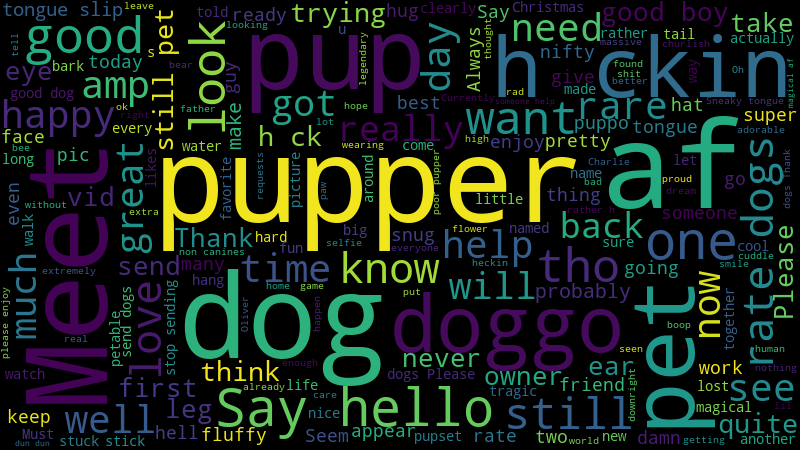

In [136]:
# Plot the Word Cloud

#Generate the wordcloud with size parameters, random_state (the number of words), and max_font_size defined
wordCloud = WordCloud(width=800, height=450, random_state=30, max_font_size=120).generate(allWords)

# Use Plotly to render the image
fig = px.imshow(wordCloud, title='Most popular words as used <a href="www.twitter.com/dog_rates">by WeRateDogs</a>', width=1000, height=600)
fig.update_layout(showlegend=False)
fig.update_xaxes(visible=False)
fig.update_yaxes(visible=False)
fig.show()

> Inferences:
> * The most commonly used words on WRD are "pupper", "Meet", "happy", "h*ckin", "doggo", "pup" etc
> * Generally, a lot of positive words are used on WRD's Twitter. 
<hr>

### Q4: Generally, what's the sentiment given off by WRD? Is it positive, neutral or negative? Is it subjective (personal and opinionated) or objective (factual)?
> I will use a binary classifier using the Twitter data to detect the sentiment of each tweet. The input data is the text and the library in use will be Python's TextBlob.
>
> I will get the score of each tweet's polarity. Polarity is the output that lies between [-1,1], where -1 refers to negative sentiment and +1 refers to positive sentiment.
>
> Subjectivity quantifies the amount of personal opinion and factual information contained in the text. The higher subjectivity means that the text contains personal opinion rather than factual information. Subjectivity output that lies within [0,1] and refers to personal opinions and judgments.
>
> I will use two custom functions to obtain these scores into new columns named `subjectivity` and `polarity` respectively.
<hr>

In [137]:
# Custom function to obtain subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Custom function to obtain polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# Apply custom functions to the `df_texts` dataframe 
df_texts['subjectivity'] = df_texts.text.apply(getSubjectivity)
df_texts['polarity'] = df_texts.text.apply(getPolarity)

df_texts

,dog_breed,timestamp,text,subjectivity,polarity
0,NaN,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,1.000000,0.000000
1,Chihuahua,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,0.433333,0.366667
2,Chihuahua,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,0.450000,0.150000
3,NaN,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,0.150000,0.500000
4,Basset,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,0.600000,0.233333
...,...,...,...,...,...
2351,Miniature Pinscher,2015-11-16 00:24:50,Here we have a 1949 1st generation vulpix. Enj...,0.000000,0.000000
2352,Rhodesian Ridgeback,2015-11-16 00:04:52,This is a purebred Piers Morgan. Loves to Netf...,0.000000,0.000000
2353,German Shepherd,2015-11-15 23:21:54,Here is a very happy pup. Big fan of well-main...,0.550000,0.500000
2354,Redbone,2015-11-15 23:05:30,This is a western brown Mitsubishi terrier. Up...,0.300000,-0.066667


In [138]:
df_texts.text[1530]

'Say hello to Geoff (pronounced "Kyle"). He accidentally opened the front facing camera. 10/10 https://t.co/TmlwQWnmRC'

> * The text above got a `Negative` polarity due to usage of the word "upset"

In [139]:
df_texts.describe()

,subjectivity,polarity
count,2356.000000,2356.000000
mean,0.485060,0.140881
std,0.333974,0.324278
min,0.000000,-1.000000
25%,0.200000,0.000000
50%,0.500000,0.050000
75%,0.741667,0.343924
max,1.000000,1.000000


> Inferences:
> *
> *

> Follow-up:
> * I will create a custom function to get a better read of each tweet's polarity in a new column named `Attitude`.
> * The logic will be dependent on the polarity score such that values below 0 will be awarded `Negative` attitude, values that are 0 will be awarded `Neutral` attitude while all values above 0 will be awarded `Positive` attitude.   

In [140]:
def getAttitude(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return'Positive'

df_texts['attitude'] = df_texts.polarity.apply(getAttitude)

In [141]:
df_texts.attitude.value_counts()

Positive    1238
Neutral      624
Negative     494
Name: attitude, dtype: int64

> Inferences:
> * **Most of WRD's tweets have got a positive attitude**. 🐶🙂

In [142]:
px.scatter(x=df_texts.polarity, y=df_texts.subjectivity, color=df_texts.attitude, title="Distribution of WeRateDogs tweets' sentiment analysis", labels={'x':'Polarity Score', 'y': 'Subjectivity Score', 'color': 'Attitude'})

> Inferences:
> * **The scatter is more skewed to the right. This confirms that WRD is generally a positive account** 

## Limitations
> * A number of predictions from the neural network seemed to have been inaccurate going by the descriptions given in the tweet texts.
> * A few tweets had since been deleted from 2015 and so I couldn't get the exact number of favorites and retweets for those tweets.
> * The `Name` column was marred with inaccuracies making it pretty hard to even come up with a model for generating analyses on dog names with the highest ratings.


## References
> * <a href="https://en.wikipedia.org/wiki/WeRateDogs">WeRateDogs Twitter</a>
> * <a href="https://stackoverflow.com/questions/28596493/asserting-columns-data-type-in-pandas">Asserting column(s) data type in Pandas</a>
> * <a href="https://pandas.pydata.org/docs/reference/api/pandas.api.types.is_datetime64_ns_dtype.html">Check whether the provided array or dtype is of the datetime64[ns] dtype</a>
> * <a href="https://www.red-gate.com/simple-talk/development/data-science-development/sentiment-analysis-python/">Sentiment Analysis with Python</a>